#Question 1: Import Libraries


In [131]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Question 2: Load dataset

In [132]:
churn = pd.read_excel('/content/Customer-Churn.xlsx')

In [133]:
#Overview of the dataset
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Question 3: Exporing data for insight

In [134]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [135]:
#checking for the number of rows and columns
churn.shape

(7043, 21)

In [136]:
#checking for overall statistics
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [137]:
#checking for null values

churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [138]:
#handling missing data for total charges
churn.dropna(inplace=True)

In [139]:
#checking again for null values if there is any
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [140]:
#Dropping customerId column

churn.drop( columns = ['customerID'],inplace=True)

#Question 4: Features selection

In [141]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data Dictionary

A data dictionary enhances our comprehension of the dataset by providing the necessary information to facilitate insight extraction.




**GENDER:** Whether the customer is a male or a female.

**Senior Citizen**: Whether the customer is a senior citizen or not (1, 0)

**Partner :** Whether the customer has a partner or not (Yes, No)

**Dependents :** Whether the customer has dependents or not (Yes, No)

**tenure :**  Number of months the customer has stayed with the company.

**PhoneService :** Whether the customer has a phone service or not (Yes, No).

**MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service).

**InternetService:** Customer's internet service provider (DSL, Fiber optic, No).

**OnlineSecurity :** Whether the customer has online security or not (Yes, No, No internet service)

**OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
  
**DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)

**TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)

**StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)

**StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)

**Contract**: The contract term of the customer (Month-to-month, One year, Two year)

**PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No

**PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges**: The amount charged to the customer monthly

**TotalCharges**: The total amount charged to the customer

**Churn**: Whether the customer churned or not (Yes or No)

In [142]:
#checking for number of unique values
churn.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [113]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [114]:
churn.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

#Question 5: Data preprocessing

In [143]:
#convert the SeniorCitizen datatype from integer to category for better visualization

churn['SeniorCitizen']=churn['SeniorCitizen'].astype('category')

Univarate Analysis

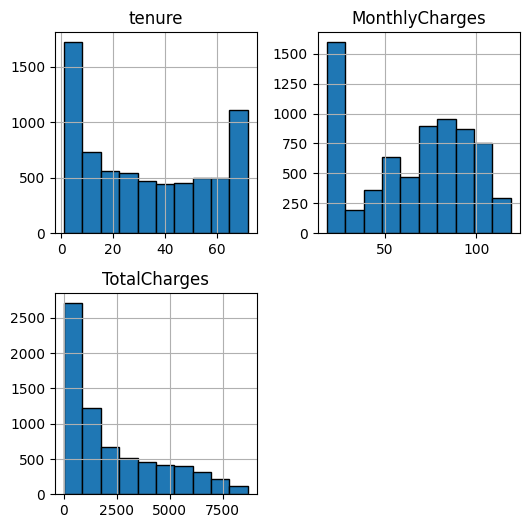

In [158]:
# univariate analysis for numerical variable

_= churn.hist(figsize=(6,6), edgecolor='black')

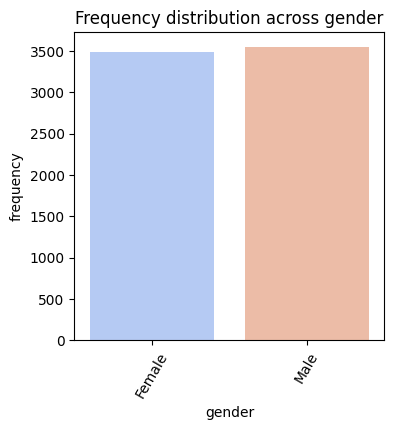

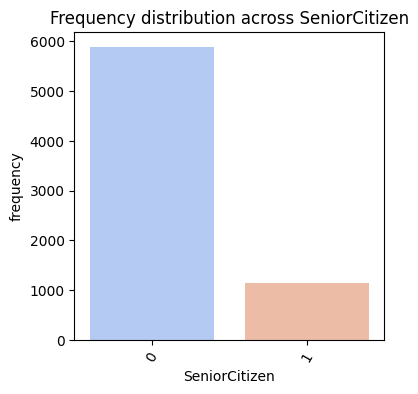

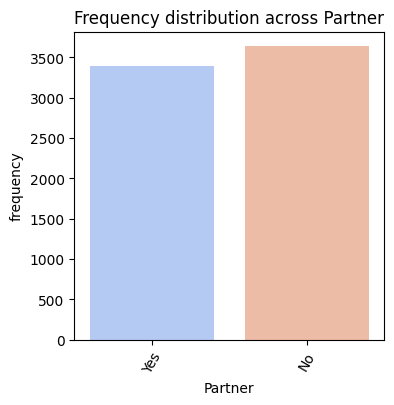

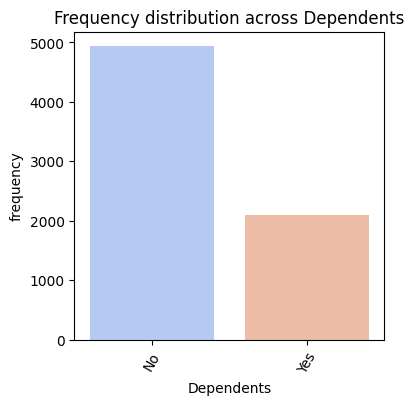

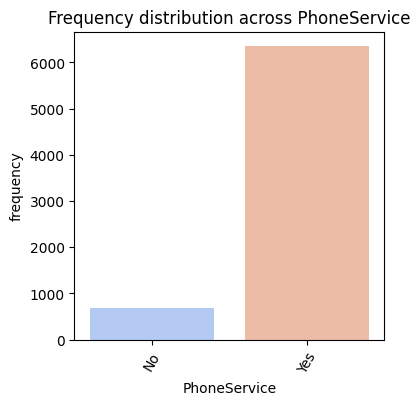

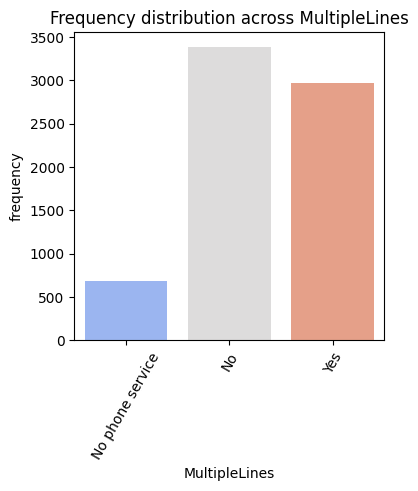

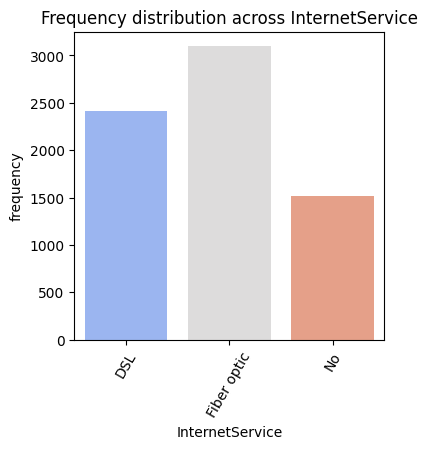

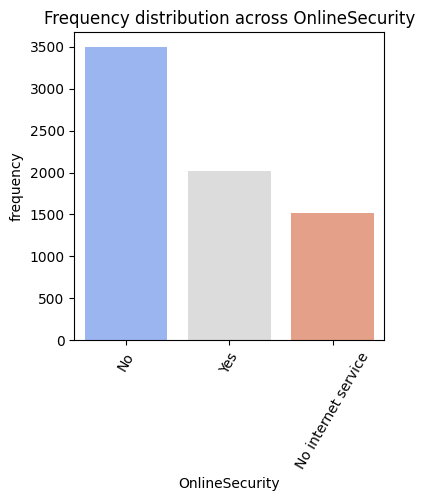

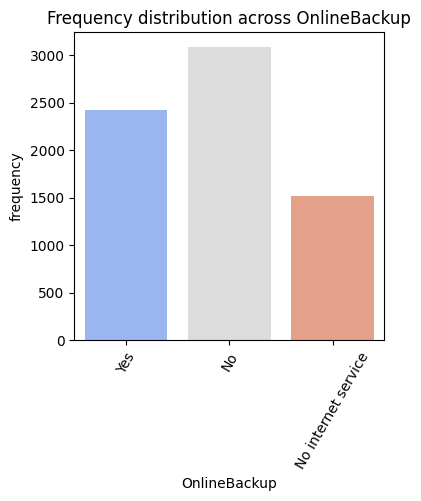

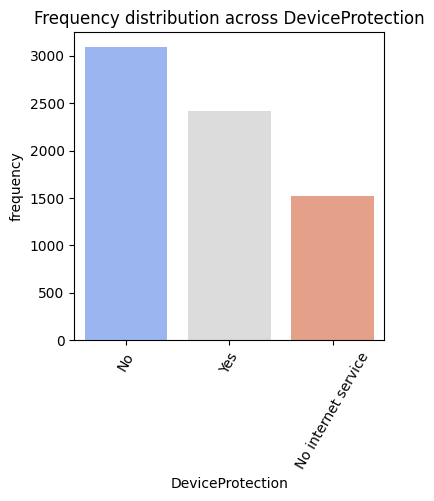

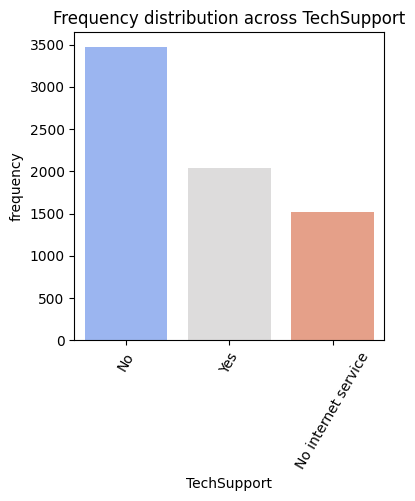

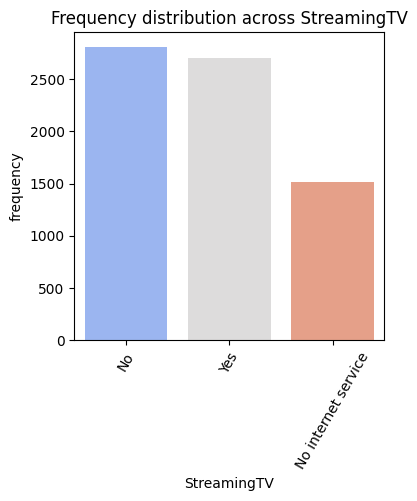

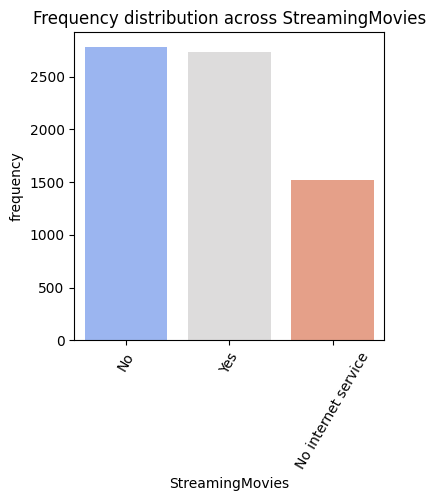

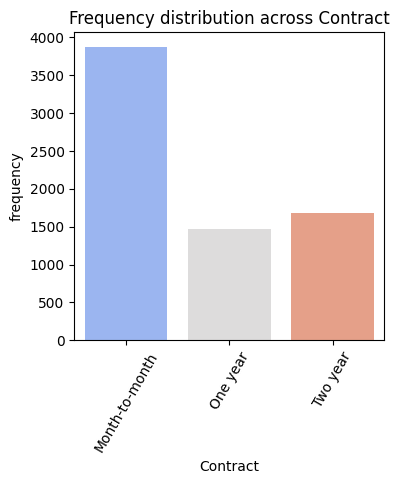

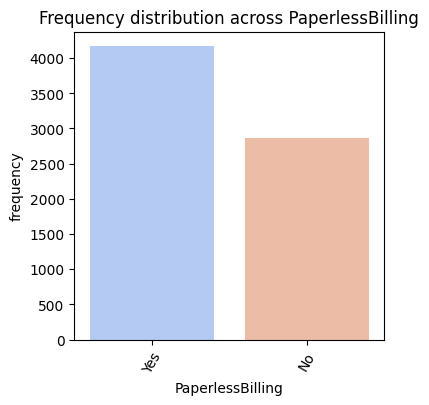

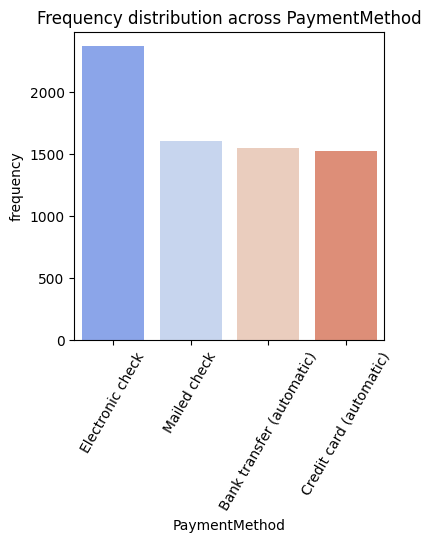

In [159]:
# univariate analysis for categorical features

column_a = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for column_a in column_a:
  plt.figure(figsize=(4,4))

 #plot bar chart for  all categorical columns
  sns.countplot ( data = churn,x= column_a, palette='coolwarm')
  plt.xlabel(column_a)
  plt.ylabel('frequency')
  plt.title(f'Frequency distribution across {column_a}')

 #rotate the x axis for readability
  plt.xticks(rotation=60)
  plt.show()


Bivariate analysis

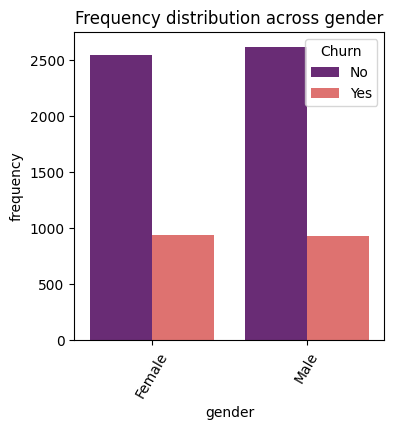

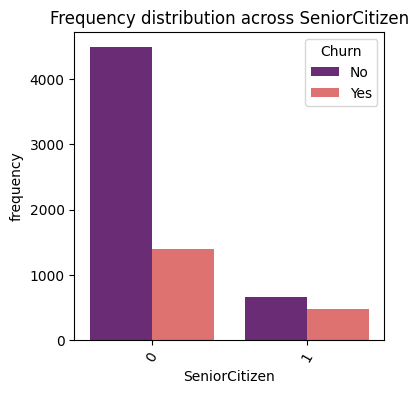

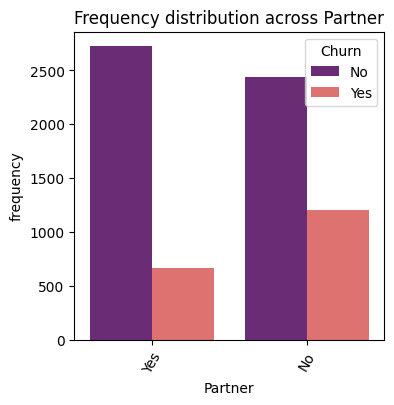

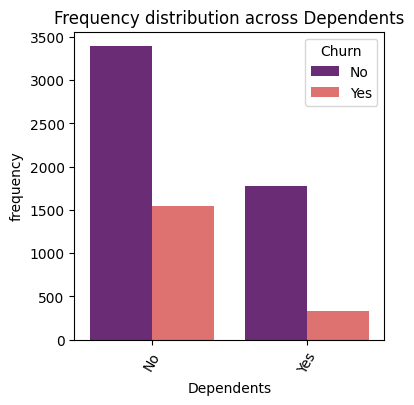

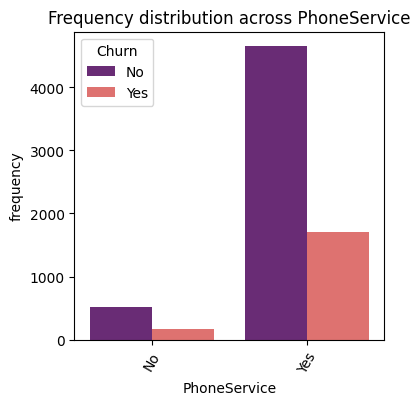

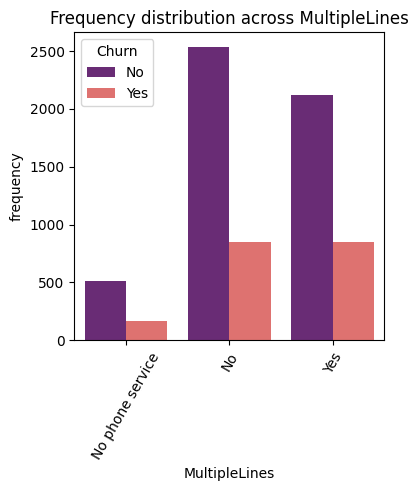

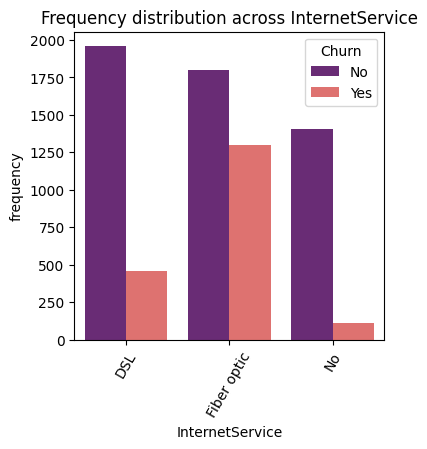

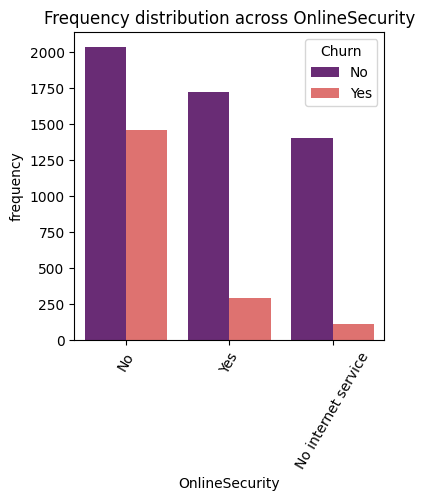

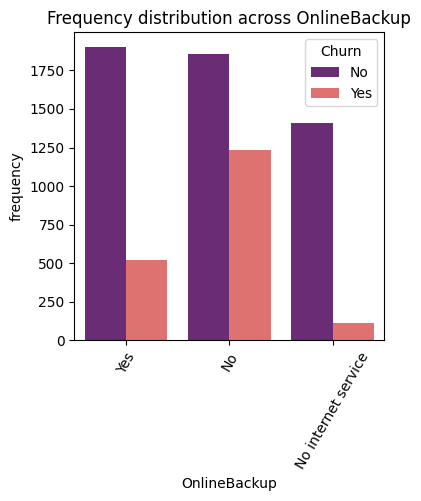

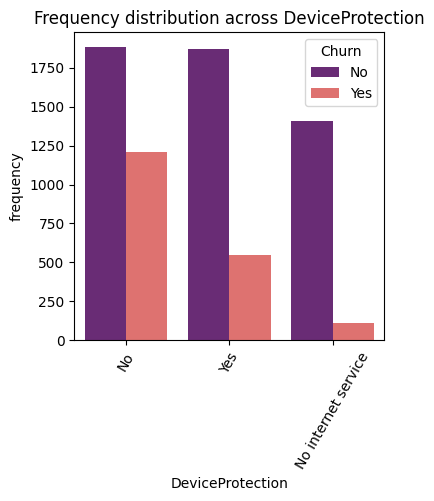

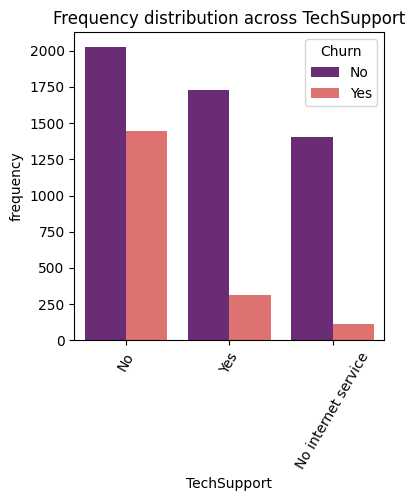

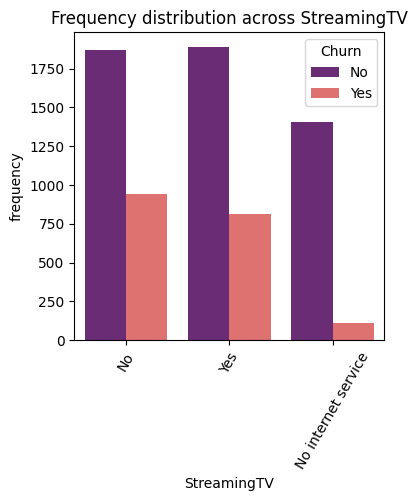

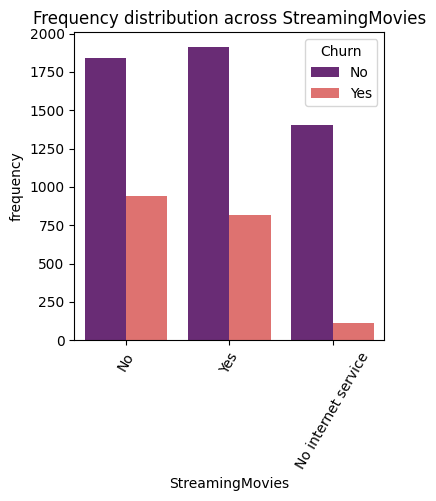

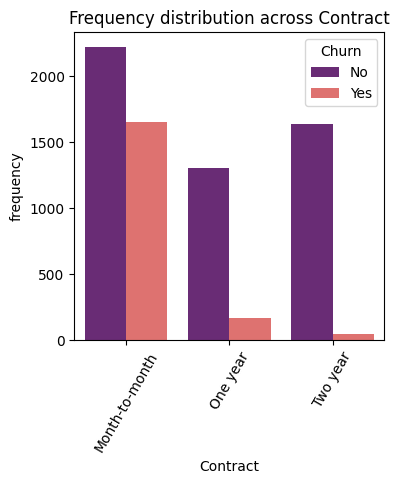

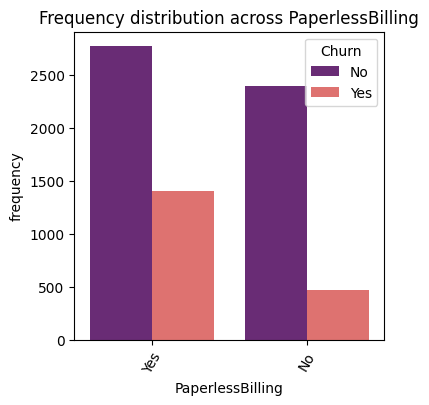

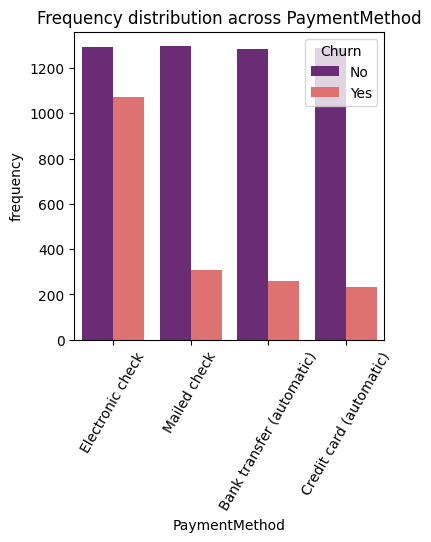

In [157]:
# Bivariate analysis
column_a = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for column_a in column_a:
  plt.figure(figsize=(4,4))

 #plot bar chart for  all categorical columns
  sns.countplot ( data = churn,x= column_a, hue= 'Churn', palette='magma')
  plt.xlabel(column_a)
  plt.ylabel('frequency')
  plt.title(f'Frequency distribution across {column_a}')

 #rotate the x axis for readability
  plt.xticks(rotation=60)
  plt.show()


*Label Encoding*

In [164]:
# Data preprocessing
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod',
       ]
label_encoder = LabelEncoder()
for column in columns_to_encode:
    churn[column] = label_encoder.fit_transform(churn[column])



In [165]:
churn.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000




spliting dataset into two parts
-The  independent variables representing the features (x)
-dependent variable target  (y).

The independent variables, which are the columns (gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity etc).

 The dependent variable is  column "Churn" which refers to the rate at which customers or subscribers stop doing business with a company or discontinue using its services during a given time period.

In [166]:
#Spliting features and target
x = churn[ ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','tenure','MonthlyCharges','TotalCharges'
]]
x.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,1,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,34,56.95,1889.50
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,2,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,45,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,2,70.70,151.65


In [167]:
y = churn['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

#Question 6: Train your model


In [168]:
# To access and utilize the LinearRegression
from sklearn.linear_model import LogisticRegression

# Create a LinearRegression model
model = LogisticRegression()

#fitting into model
model.fit(x, y)


LogisticRegression()

In [169]:
# Predicting customer churn for the original data points

y_pred = model.predict(x)
y_pred[:5]

array(['Yes', 'No', 'No', 'No', 'Yes'], dtype=object)

#Question 7: Evaluate the Model


Evaluating the model gives an overwiew of the model performance how well it can work with new data.

In [170]:
# Evaluate the model's performance using appropriate evaluation metrics
from sklearn.metrics import accuracy_score

accuracy_1 = accuracy_score(y,y_pred).round(5)
print(accuracy_1*100)

79.764


confusion matrix gives the number of true positive, true negative, false positive, and false negative predictions, providing insights into the performance of the model across different classes.

In [171]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[4569  594]
 [ 829 1040]]


In [178]:
from sklearn.metrics import precision_score

precision_score = precision_score(y, y_pred, pos_label='Yes') #True Positive/ (True positive + False positive)
print(precision_score)


0.6364749082007344


In [179]:
from sklearn.metrics import recall_score

recall_score = recall_score(y, y_pred, pos_label='Yes') #True Positive / (True positive + False Negative)
print(recall_score)


0.5564472980203318


In [177]:
from sklearn.metrics import f1_score

f1_score = f1_score(y, y_pred, pos_label='Yes') # 2 * (precision*recall) / ( precious+recall)
print(f1_score)

0.5937767627747644


Evaluating model predictions

1. Accuracy: 79.76%
* The accuracy represents the proportion of correctly classified instances out of the total instances in the test set. In this case, the model correctly predicted around 79.76% of the instances.

2. Precision: 63.65%
* Precision measures the proportion of correctly predicted positive instances (churned customers) out of all instances predicted as positive by the model. A precision of 63.65% means that when the model predicts a customer will churn, it is correct about63.65% of the time.

3. Recall: 55.6%
Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive instances (in this case, churned customers) that were correctly identified by the model.

* A recall of 55.6% indicates that the model correctly identified approximately 55.6% of the actual churned customers. This means that around 55.6% of the customers who actually churned were correctly classified as such by the model.

4. F1 Score: 59.37%
* it suggests that the model predicts a 59.37% likelihood of a customer churning based on the features provided.